In [1]:
import autokeras as ak
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from scipy.special import softmax
from utils import *

In [2]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
path_dataset = 'datasets/flower'
X, Y, label_names, info = load_image_data(path_dataset, split='train')

Loaded 450 images from datasets/flower\train/0_dandelion
Loaded 450 images from datasets/flower\train/1_daisy
Loaded 450 images from datasets/flower\train/2_tulips
datasets/flower\train X count (shape): 1350 ((257, 320, 3)), Y count (shape): 1350 ((3,))


In [6]:
label_names

['dandelion', 'daisy', 'tulips']

In [7]:
info

{'base_path': 'datasets/flower',
 'split': 'train',
 'label_names': ['dandelion', 'daisy', 'tulips']}

C:\Projects\AIF_AutoML\utils.py:176: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


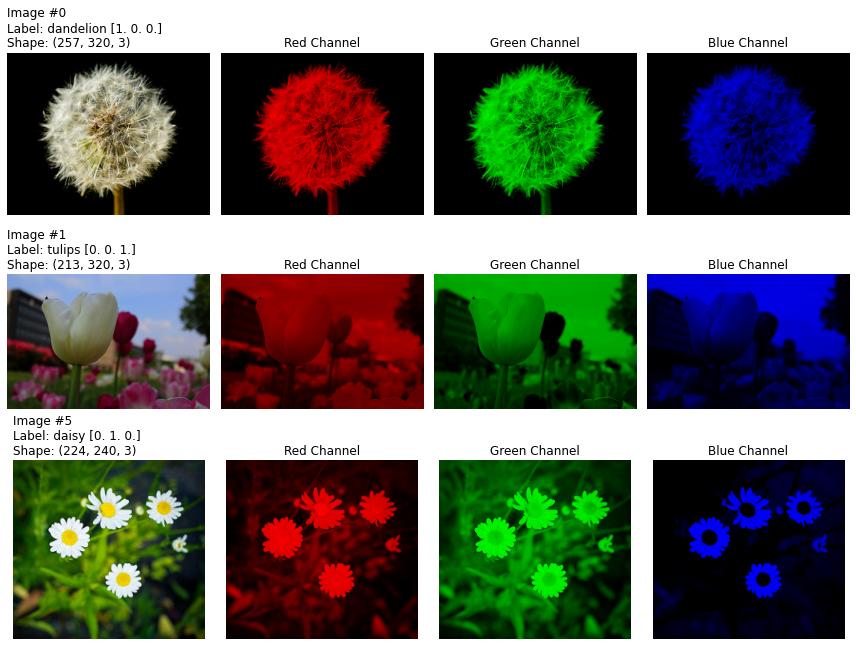

In [8]:
plot_images(images=X, labels=Y, label_names=label_names, i_list=[0, 1, 5])

100%|██████████| 1350/1350 [00:00<00:00, 674486.05it/s]
C:\Users\CARPED~1\AppData\Local\Temp/ipykernel_22660/3318589542.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  XX, YY = np.array(XX), np.array(YY)
C:\Projects\AIF_AutoML\utils.py:176: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


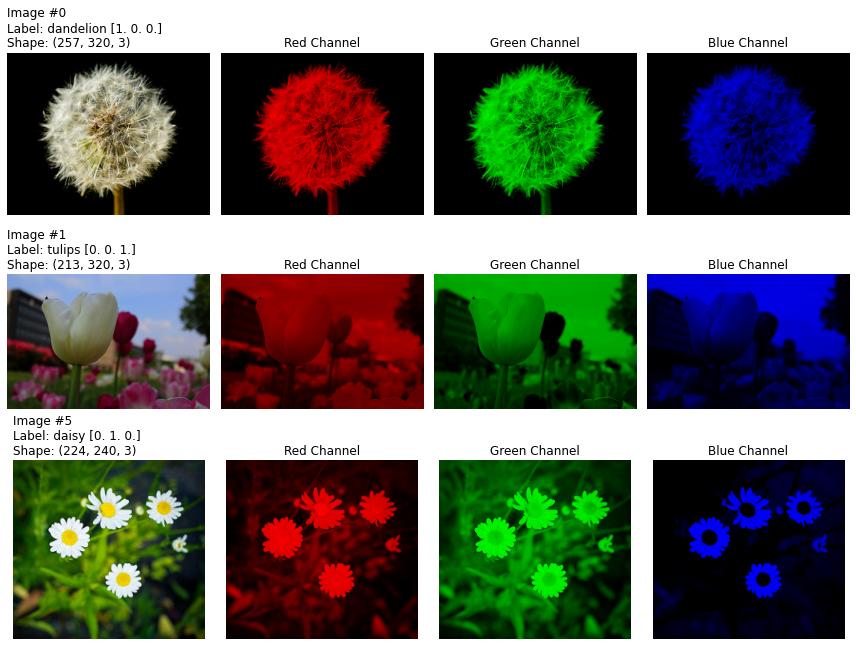

In [9]:
def preprocessing(X, Y, i_list=[]):
    XX, YY = [], []
    for i in tqdm(i_list if len(i_list) > 0 else range(len(X))):
        x, y = X[i], Y[i]

        ### preprocessing pipeline - start ###
        # x = resize_and_crop_image(x, target_size=(100, 100))
        # x = resize_and_fill_image(x, target_size=(100, 100), fill_color=(255, 255, 255))
        # x = rgb_to_grayscale_image(x)
        # x = flip_image(x, mode='lr')
        # x = flip_image(x, mode='ud')
        # x = rotate_image(image=x, angle_list=[])
        ### preprocessing pipeline - end ###

        XX.append(x)
        YY.append(y)

    ### augmentation pipeline - start ###
    # XX, YY = mixup_images(XX, YY)
    # XX, YY = cutmix_images(XX, YY)
    ### augmentation pipeline - end ###

    XX, YY = np.array(XX), np.array(YY)

    return XX, YY


XX, YY = preprocessing(X, Y)
plot_images(images=XX, labels=YY, label_names=label_names, i_list=[0, 1, 5])

In [10]:
### Optimize model for train dataset via AutoML ###
trial_max = 5  # model search trials
epoch_max = 100  # epochs for each model
project_name = 'AutoML_img_clf'
train_validation_split = 0.2
train_validation_split_random_state = 42
augment = False
# augment = ak.ImageAugmentation(horizontal_flip=True, vertical_flip=True, rotation_factor=1, zoom_factor=0.5, contrast_factor=0.5)

### Split dataset into train and validation ###
XX_train, XX_val, YY_train, YY_val = train_test_split(XX, YY, test_size=train_validation_split, random_state=train_validation_split_random_state)

### Optimize model for train dataset via AutoML ###
input_node = ak.ImageInput()
output_node = ak.ImageBlock(augment=augment)(input_node)
output_node = ak.ClassificationHead()(output_node)
model = ak.AutoModel(inputs=input_node, outputs=output_node, project_name=project_name, overwrite=True, max_trials=trial_max)
model.fit(XX_train, YY_train, validation_data=(XX_val, YY_val), epochs=epoch_max)

TypeError: Expect the data to ImageInput to be numerical, but got object.

Trial 3 Complete [00h 00m 41s]
val_accuracy: 0.7259259223937988

Best val_accuracy So Far: 0.7259259223937988
Total elapsed time: 00h 02m 08s
Epoch 1/100
34/34 [==============================] - 6s 86ms/step - loss: 1.5582 - accuracy: 0.5657 - val_loss: 1442.0823 - val_accuracy: 0.3741
Epoch 2/100
34/34 [==============================] - 2s 64ms/step - loss: 0.6638 - accuracy: 0.7259 - val_loss: 5.2283 - val_accuracy: 0.5037
Epoch 3/100
34/34 [==============================] - 2s 64ms/step - loss: 0.4386 - accuracy: 0.8389 - val_loss: 1.8791 - val_accuracy: 0.4667
Epoch 4/100
34/34 [==============================] - 2s 66ms/step - loss: 0.4660 - accuracy: 0.8343 - val_loss: 1.1829 - val_accuracy: 0.6296
Epoch 5/100
34/34 [==============================] - 2s 70ms/step - loss: 0.4625 - accuracy: 0.8250 - val_loss: 1.4214 - val_accuracy: 0.6185
Epoch 6/100
34/34 [==============================] - 2s 67ms/step - loss: 0.3902 - accuracy: 0.8722 - val_loss: 2.3564 - val_accuracy: 0.6407
Epo

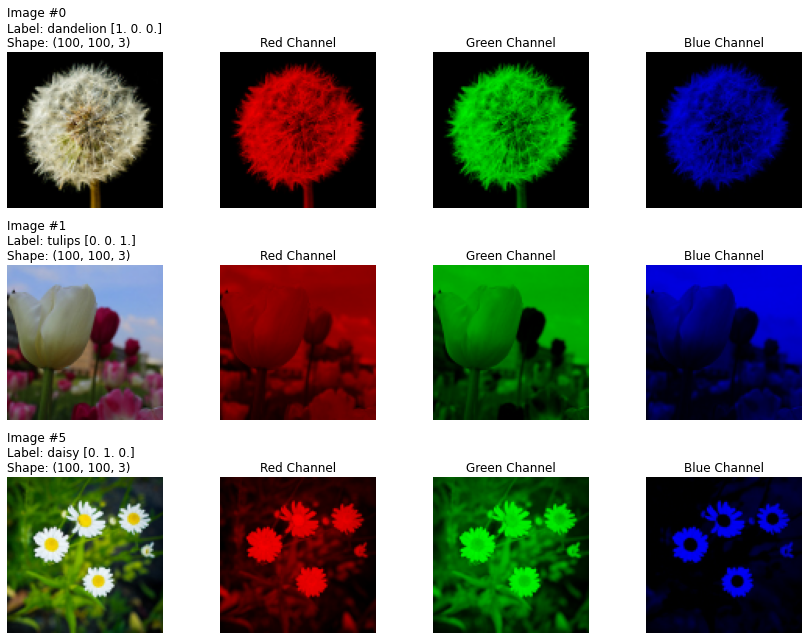

In [10]:
def preprocessing(X, Y, i_list=[]):
    XX, YY = [], []
    for i in tqdm(i_list if len(i_list) > 0 else range(len(X))):
        x, y = X[i], Y[i]

        ### preprocessing pipeline - start ###
        x = resize_and_crop_image(x, target_size=(100, 100))
        # x = resize_and_fill_image(x, target_size=(100, 100), fill_color=(255, 255, 255))
        # x = rgb_to_grayscale_image(x)
        # x = flip_image(x, mode='lr')
        # x = flip_image(x, mode='ud')
        # x = rotate_image(image=x, angle_list=[])
        ### preprocessing pipeline - end ###

        XX.append(x)
        YY.append(y)

    ### augmentation pipeline - start ###
    # XX, YY = mixup_images(XX, YY)
    # XX, YY = cutmix_images(XX, YY)
    ### augmentation pipeline - end ###

    XX, YY = np.array(XX), np.array(YY)

    return XX, YY


### Optimize model for train dataset via AutoML ###
path_dataset = 'datasets/flower'
i_check_list = [0, 1, 5]
objective = 'val_accuracy'
trial_max = 3  # model search trials
epoch_max = 100  # epochs for each model
project_name = 'AutoML_img_clf'
train_validation_split = 0.2
train_validation_split_random_state = 42
augment = False
# augment = ak.ImageAugmentation(horizontal_flip=True, vertical_flip=True, rotation_factor=1, zoom_factor=0.5, contrast_factor=0.5)

### Load Dataset ###
X, Y, label_names, info = load_image_data(path_dataset, split='train')

### Preprocess dataset ###
XX, YY = preprocessing(X, Y)
plot_images(images=XX, labels=YY, label_names=label_names, i_list=i_check_list)

### Split dataset into train and validation ###
XX_train, XX_val, YY_train, YY_val = train_test_split(XX, YY, test_size=train_validation_split, random_state=train_validation_split_random_state)

### Optimize model for train dataset via AutoML ###
input_node = ak.ImageInput()
output_node = ak.ImageBlock(augment=augment)(input_node)
output_node = ak.ClassificationHead()(output_node)
model = ak.AutoModel(inputs=input_node, outputs=output_node, objective=objective, project_name=project_name, overwrite=True, max_trials=trial_max)
model.fit(XX_train, YY_train, validation_data=(XX_val, YY_val), epochs=epoch_max)

### Load best model ###
model_best = tf.keras.models.load_model(os.path.join(project_name, 'best_model'))
model_best.summary()

In [11]:
### Load best model ###
model_best = tf.keras.models.load_model(os.path.join(project_name, 'best_model'))

### Evaluate best model for test dataset ###
X_test, Y_test, label_names, info = load_image_data(path_dataset, split='test')
XX_test, YY_test = preprocessing(X_test, Y_test)
YY_predicted = model_best.predict(XX_test)
YY_probability = softmax(YY_predicted, axis=1)

### Calculate accuracy ###
YY_test_index, YY_predicted_index = np.argmax(YY_test, axis=1), np.argmax(YY_predicted, axis=1)
accuracy = accuracy_score(YY_test_index, YY_predicted_index)
print(f'{path_dataset} :: Test Dataset :: Accuracy = {accuracy:.3f}')

### Plot confusion matrix ###
cm = confusion_matrix(YY_test_index, YY_predicted_index, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
fig, ax = plt.subplots(figsize=(5, 5))  # Adjust the size (width, height) as needed
disp.plot(ax=ax, values_format='.2f')
plt.show()

Loaded 50 images from datasets/flower\test/0_dandelion
Loaded 50 images from datasets/flower\test/1_daisy
Loaded 50 images from datasets/flower\test/2_tulips


100%|██████████| 150/150 [00:00<00:00, 2128.10it/s]

datasets/flower\test X count (shape): 150 ((240, 320, 3)), Y count (shape): 150 ((3,))


datasets/flower :: Test Dataset :: Accuracy = 0.753


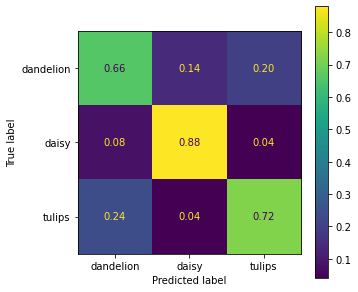

In [12]:
### Plot confusion matrix ###
cm = confusion_matrix(YY_test_index, YY_predicted_index, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
fig, ax = plt.subplots(figsize=(5, 5))  # Adjust the size (width, height) as needed
disp.plot(ax=ax, values_format='.2f')
plt.show()

In [20]:
### Extra Training ###
epoch_max = 20
path_model_best = 'model_best.h5'

model_best = tf.keras.models.load_model(os.path.join(project_name, 'best_model'))
model_best.fit(XX_train, YY_train, validation_data=(XX_val, YY_val), epochs=epoch_max)

model_best.save(path_model_best)
model_best = tf.keras.models.load_model(path_model_best)
print('### Model loaded:', path_model_best)

Epoch 1/20
34/34 [==============================] - 6s 85ms/step - loss: 0.5348 - accuracy: 0.8565 - val_loss: 30884.3398 - val_accuracy: 0.3741
Epoch 2/20
34/34 [==============================] - 2s 68ms/step - loss: 0.2303 - accuracy: 0.9287 - val_loss: 11.2397 - val_accuracy: 0.5852
Epoch 3/20
34/34 [==============================] - 2s 66ms/step - loss: 0.1916 - accuracy: 0.9306 - val_loss: 4.2836 - val_accuracy: 0.5704
Epoch 4/20
34/34 [==============================] - 2s 72ms/step - loss: 0.1300 - accuracy: 0.9611 - val_loss: 2.2318 - val_accuracy: 0.5963
Epoch 5/20
34/34 [==============================] - 2s 68ms/step - loss: 0.0795 - accuracy: 0.9787 - val_loss: 5.8259 - val_accuracy: 0.5741
Epoch 6/20
34/34 [==============================] - 2s 66ms/step - loss: 0.1106 - accuracy: 0.9630 - val_loss: 3.1301 - val_accuracy: 0.5778
Epoch 7/20
34/34 [==============================] - 2s 67ms/step - loss: 0.1806 - accuracy: 0.9454 - val_loss: 4.1018 - val_accuracy: 0.4296
Epoch 8/

In [25]:
### LIME (Local Interpretable Model-agnostic Explanations) ###
from lime import lime_image
from lime.wrappers.scikit_image import SegmentationAlgorithm
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

i_check = 0
num_segments = 100
num_samples = 1000
seg_type = 'quickshift'  # algo_type: quickshift, felzenszwalb, slic

### Load best model ###
model_best = tf.keras.models.load_model(os.path.join(project_name, 'best_model'))

### Load dataset ###
X_test, Y_test, label_names, info = load_image_data(path_dataset, split='test')
XX_test, YY_test = preprocessing(X_test, Y_test)
YY_predicted = model_best.predict(XX_test)
YY_probability = softmax(YY_predicted, axis=1)
print(YY_test[i_check], YY_predicted[i_check], YY_probability[i_check])

# Initialize LIME Image Explainer
explainer = lime_image.LimeImageExplainer()

# Define a segmentation function
segmenter = SegmentationAlgorithm(algo_type=seg_type, n_segments=num_segments, compactness=1, sigma=1)  # algo_type: quickshift, felzenszwalb, slic
# Choose a random image from your test set
test_image = XX_test[i_check]

# Explain the prediction
explanation = explainer.explain_instance(test_image, model_best.predict, top_labels=len(label_names), hide_color=0, num_samples=num_samples, segmentation_fn=segmenter)
i_label_predicted = explanation.top_labels[0]

  0%|          | 0/150 [00:00<?, ?it/s]

Loaded 50 images from datasets/flower\test/0_dandelion
Loaded 50 images from datasets/flower\test/1_daisy
Loaded 50 images from datasets/flower\test/2_tulips
datasets/flower\test X count (shape): 150 ((240, 320, 3)), Y count (shape): 150 ((3,))


100%|██████████| 150/150 [00:00<00:00, 1610.07it/s]


[0. 1. 0.] [2.6429022e-12 1.0000000e+00 1.8074175e-09] [0.21194156 0.5761169  0.21194156]


  0%|          | 0/1000 [00:00<?, ?it/s]

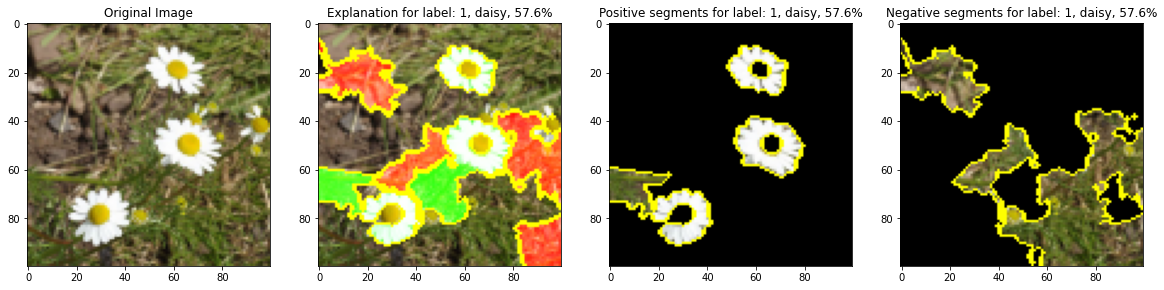

In [24]:
num_features = 5

# Display the image and the explanation
fig, ax_list = plt.subplots(1, 4, figsize=(20, 10))

# Original Image
ax = ax_list[0]
ax.imshow(test_image)
ax.set_title('Original Image')

ax = ax_list[1]
temp, mask = explanation.get_image_and_mask(i_label_predicted, positive_only=False, num_features=num_features * 2, hide_rest=False)
ax.imshow(mark_boundaries(temp / 255.0, mask))
ax.set_title('Explanation for label: {}, {}, {:.1f}%'.format(i_label_predicted, label_names[i_label_predicted], YY_probability[i_test][i_label_predicted] * 100))

# LIME Explanation
ax = ax_list[2]
temp, mask = explanation.get_image_and_mask(i_label_predicted, positive_only=True, num_features=num_features, hide_rest=True)
ax.imshow(mark_boundaries(temp / 255.0, mask))
ax.set_title('Positive segments for label: {}, {}, {:.1f}%'.format(i_label_predicted, label_names[i_label_predicted], YY_probability[i_test][i_label_predicted] * 100))

ax = ax_list[3]
temp, mask = explanation.get_image_and_mask(i_label_predicted, positive_only=False, negative_only=True, num_features=num_features, hide_rest=True)
ax.imshow(mark_boundaries(temp / 255.0, mask))
ax.set_title('Negative segments for label: {}, {}, {:.1f}%'.format(i_label_predicted, label_names[i_label_predicted], YY_probability[i_test][i_label_predicted] * 100))

plt.show()

Loaded 50 images from datasets/flower\test/0_dandelion
Loaded 50 images from datasets/flower\test/1_daisy
Loaded 50 images from datasets/flower\test/2_tulips
datasets/flower\test X count (shape): 150 ((240, 320, 3)), Y count (shape): 150 ((3,))


100%|██████████| 150/150 [00:00<00:00, 2049.57it/s]


1, daisy, 57.6%
2, tulips, 21.2%
0, dandelion, 21.2%


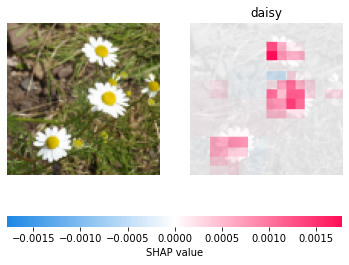

In [30]:
import shap
import numpy as np

i_check = 0
max_evals = 500
batch_size = 50

# Load your model
model_best = tf.keras.models.load_model(os.path.join(project_name, 'best_model'))

# Load or preprocess your test data
X_test, Y_test, label_names, info = load_image_data(path_dataset, split='test')
XX_test, YY_test = preprocessing(X_test, Y_test)
YY_predicted = model_best.predict(XX_test)
YY_probability = softmax(YY_predicted, axis=1)

i_sort = np.argsort(YY_probability[i_check])[::-1]
for i in i_sort:
    print('%d, %s, %.1f%%' % (i, label_names[i], YY_probability[i_check][i] * 100))

masker = shap.maskers.Image("inpaint_telea", XX_test[i_check].shape)
explainer = shap.Explainer(model_best, masker, output_names=label_names)

shap_values = explainer(XX_test[i_check:i_check + 1], max_evals=max_evals, batch_size=batch_size, outputs=shap.Explanation.argsort.flip[:1])
# shap_values = explainer(XX_test[i_check:i_check + 1], max_evals=max_evals, batch_size=batch_size, outputs=shap.Explanation.argsort.flip)
shap.image_plot(shap_values)

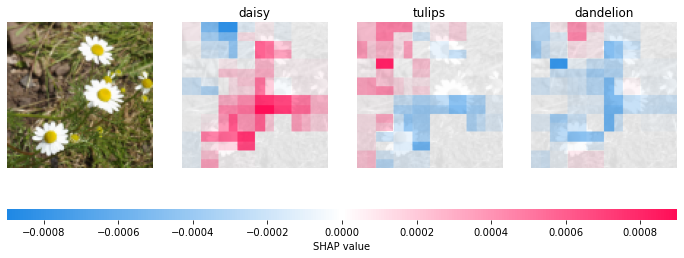

In [183]:
shap_values = explainer(XX_test[i_test:i_test + 1], max_evals=500, batch_size=50, outputs=shap.Explanation.argsort.flip)
shap.image_plot(shap_values)

Trial 3 Complete [00h 01m 41s]
val_accuracy: 0.7649999856948853

Best val_accuracy So Far: 0.7649999856948853
Total elapsed time: 00h 04m 01s
Epoch 1/100
25/25 [==============================] - 4s 72ms/step - loss: 0.9696 - accuracy: 0.4938 - val_loss: 0.8752 - val_accuracy: 0.5000
Epoch 2/100
25/25 [==============================] - 1s 42ms/step - loss: 0.9504 - accuracy: 0.4750 - val_loss: 0.8531 - val_accuracy: 0.5000
Epoch 3/100
25/25 [==============================] - 1s 42ms/step - loss: 0.9264 - accuracy: 0.4825 - val_loss: 0.8335 - val_accuracy: 0.5000
Epoch 4/100
25/25 [==============================] - 1s 35ms/step - loss: 0.9076 - accuracy: 0.4875 - val_loss: 0.8166 - val_accuracy: 0.5000
Epoch 5/100
25/25 [==============================] - 1s 40ms/step - loss: 0.8805 - accuracy: 0.5063 - val_loss: 0.8018 - val_accuracy: 0.5000
Epoch 6/100
25/25 [==============================] - 1s 38ms/step - loss: 0.8611 - accuracy: 0.5038 - val_loss: 0.7884 - val_accuracy: 0.5000
Epoch 

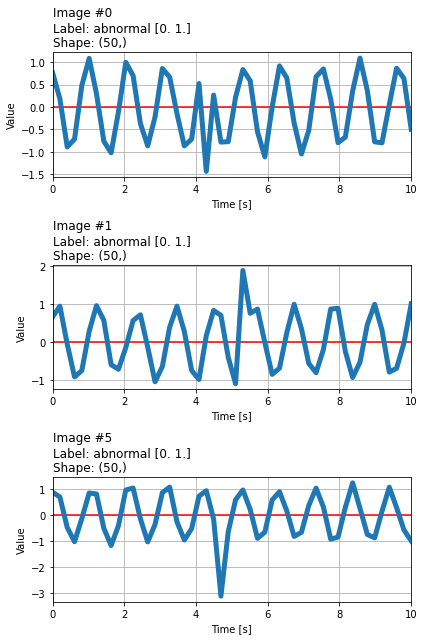

In [31]:
path_dataset = 'datasets/sigpeak'
objective = 'val_accuracy'
trial_max = 3  # model search trials
epoch_max = 100  # epochs for each model
project_name = 'AutoML_sig_clf'


def preprocessing(T, X, Y, i_list=[]):
    TT, XX, YY = [], [], []
    for i in tqdm(i_list if len(i_list) > 0 else range(len(X))):
        t, x, y = T[i], X[i], Y[i]

        # x = absolute_signal(x)
        # x = min_max_scaling_signal(x)
        # x = standardize_signal(x)
        # x = moving_average_signal(x, window_size=10)
        # x = linear_detrend_signal(x)
        # x = remove_outlier(x, threshold=1)
        # x = lowpass_filter(x, time_delta=t[1] - t[0], cutoff_freq=1)
        # x = highpass_filter(x, time_delta=t[1] - t[0], cutoff_freq=1)

        TT.append(t)
        XX.append(x)
        YY.append(y)

    XX, YY = np.array(XX), np.array(YY)

    return TT, XX, YY


T, X, Y, label_names, info = load_signal_data(dir_base_path=path_dataset, split='train')
TT, XX, YY = preprocessing(T, X, Y)
plot_signals(axis=TT, signals=XX, labels=YY, label_names=label_names, i_list=[0, 1, 5], axis_name='Time [s]')

XX_train, XX_val, YY_train, YY_val = train_test_split(np.array(XX)[:, np.newaxis, :], np.argmax(np.array(YY), axis=1), test_size=0.2, random_state=42)

input_node = ak.ImageInput()
output_node = ak.ImageBlock(augment=False)(input_node)
output_node = ak.ClassificationHead()(output_node)
model = ak.AutoModel(inputs=input_node, outputs=output_node, objective=objective, project_name=project_name, overwrite=True, max_trials=trial_max)
model.fit(XX_train, YY_train, validation_data=(XX_val, YY_val), epochs=epoch_max)

model_best = tf.keras.models.load_model(os.path.join(project_name, 'best_model'))
model_best.summary()

In [34]:
print(len(XX_train), len(YY_train))

800 800


In [35]:
print(XX_train[0].shape, XX_train[0].shape)

(1, 50) (1, 50)


100%|██████████| 100/100 [00:00<?, ?it/s]

Loaded 50 signals from datasets/sigpeak\test/0_normal
Loaded 50 signals from datasets/sigpeak\test/1_abnormal
datasets/sigpeak\test T count (shape): 100 ((50,)), X count (shape): 100 ((50,)), Y count (shape): 100 ((2,))



Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


datasets/sigpeak :: Test Dataset :: Accuracy = 0.770


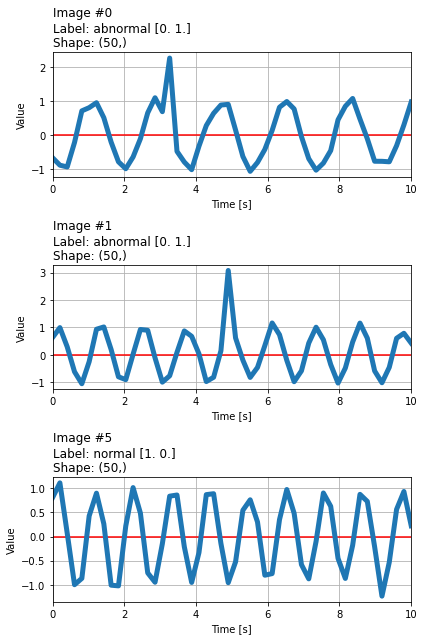

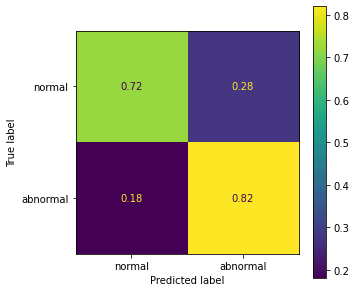

In [36]:
model_best = tf.keras.models.load_model(os.path.join(project_name, 'best_model'))

T_test, X_test, Y_test, label_names, info = load_signal_data(dir_base_path=path_dataset, split='test')
TT_test, XX_test, YY_test = preprocessing(T_test, X_test, Y_test)
plot_signals(axis=TT_test, signals=XX_test, labels=YY_test, label_names=label_names, i_list=[0, 1, 5], axis_name='Time [s]')

YY_predicted = model_best.predict(np.array(XX_test)[:, np.newaxis, :])
YY_predicted[YY_predicted >= 0.5] = 1
YY_predicted[YY_predicted < 0.5] = 0

### Calculate accuracy ###
accuracy = accuracy_score(np.argmax(np.array(YY_test), axis=1), YY_predicted)
print(f'{path_dataset} :: Test Dataset :: Accuracy = {accuracy:.3f}')

### Plot confusion matrix ###
cm = confusion_matrix(np.argmax(np.array(YY_test), axis=1), YY_predicted, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
fig, ax = plt.subplots(figsize=(5, 5))  # Adjust the size (width, height) as needed
disp.plot(ax=ax, values_format='.2f')
plt.show()

Loaded 500 signals from datasets/sigpeak\train/0_normal


100%|██████████| 100/100 [00:00<?, ?it/s]

Loaded 500 signals from datasets/sigpeak\train/1_abnormal
datasets/sigpeak\train T count (shape): 1000 ((50,)), X count (shape): 1000 ((50,)), Y count (shape): 1000 ((2,))
Loaded 50 signals from datasets/sigpeak\test/0_normal
Loaded 50 signals from datasets/sigpeak\test/1_abnormal
datasets/sigpeak\test T count (shape): 100 ((50,)), X count (shape): 100 ((50,)), Y count (shape): 100 ((2,))


[0. 1.] [1.]


invalid value encountered in sqrt
Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


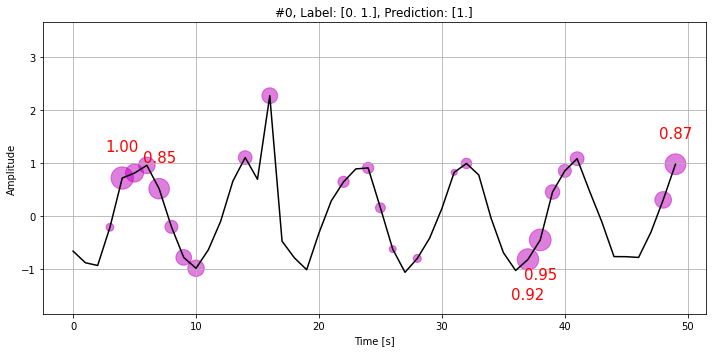

In [51]:
from lime.lime_tabular import LimeTabularExplainer

i_check = 1
y_lim_factor = 1.5

model_best = tf.keras.models.load_model(os.path.join(project_name, 'best_model'))

T, X, Y, label_names, info = load_signal_data(dir_base_path=path_dataset, split='train')
TT_train, XX_train, YY_train = preprocessing(T, X, Y)
T_test, X_test, Y_test, label_names, info = load_signal_data(dir_base_path=path_dataset, split='test')
TT_test, XX_test, YY_test = preprocessing(T_test, X_test, Y_test)
num_features = XX_test.shape[-1]

YY_predicted = model_best.predict(np.array(XX_test)[:, np.newaxis, :])
YY_predicted[YY_predicted >= 0.5] = 1
YY_predicted[YY_predicted < 0.5] = 0
YY_probability = np.c_[1 - YY_predicted, YY_predicted]


def model_func(x):
    xx = x[:, np.newaxis, :]
    yy = model_best.predict(xx)
    return np.c_[1 - yy, yy]


explainer = LimeTabularExplainer(XX_train, feature_names=range(num_features), class_names=label_names, discretize_continuous=False)
explanation = explainer.explain_instance(XX_test[i_check], model_func, num_features=num_features, top_labels=len(label_names))
importance = np.array(explanation.as_list())  # feature_names, weights
importance[:, 1] = importance[:, 1] / max(importance[:, 1])
i_sort = np.argsort(importance[:, 0])
importance = importance[i_sort]

x, y, prediction = XX_test[i_check], YY_test[i_check], YY_predicted[i_check]
print(y, prediction)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.cla()
ax.plot(x, 'k')
ax.scatter(x=range(len(x)), y=x, s=importance[:, 1] * 5e2, c='m', alpha=0.5)
ax.grid()
ymin, ymax = ax.get_ylim()
ax.set_ylim(ymin * y_lim_factor, ymax * y_lim_factor)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')
ax.set_title(f'#{i_check}, Label: {y}, Prediction: {prediction}')

i_importance_rank = np.argsort(importance[:, 1])
for i in i_importance_rank[-5:]:
    offset = 0.5 if x[i] >= 0 else -0.75
    ax.annotate(f'{importance[i, 1]:.2f}', (i, x[i] + offset), fontsize=15, color='r', ha='center')
fig.set_size_inches(10, 5)
fig.tight_layout()
fig.show()

Loaded 500 signals from datasets/sigpeak\train/0_normal


100%|██████████| 100/100 [00:00<?, ?it/s]

Loaded 500 signals from datasets/sigpeak\train/1_abnormal
datasets/sigpeak\train T count (shape): 1000 ((50,)), X count (shape): 1000 ((50,)), Y count (shape): 1000 ((2,))
Loaded 50 signals from datasets/sigpeak\test/0_normal
Loaded 50 signals from datasets/sigpeak\test/1_abnormal
datasets/sigpeak\test T count (shape): 100 ((50,)), X count (shape): 100 ((50,)), Y count (shape): 100 ((2,))


1, abnormal, 100.0%
0, normal, 0.0%


PermutationExplainer explainer: 2it [00:19, 19.36s/it]               

shap_values: (1, 50, 2)
shap_values_normalized: (2, 50)



invalid value encountered in sqrt
Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


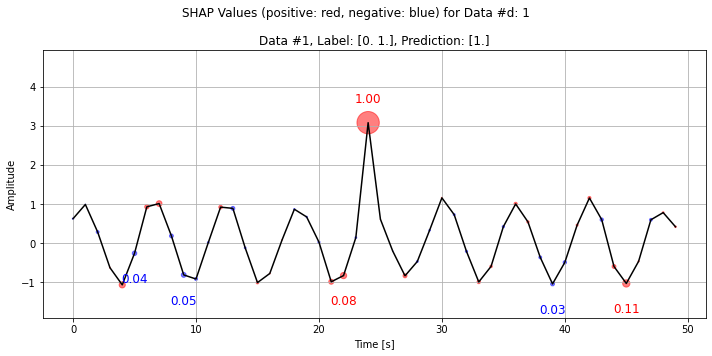

In [53]:
import shap

i_check = 1

model_best = tf.keras.models.load_model(os.path.join(project_name, 'best_model'))

T, X, Y, label_names, info = load_signal_data(dir_base_path=path_dataset, split='train')
TT_train, XX_train, YY_train = preprocessing(T, X, Y)
T_test, X_test, Y_test, label_names, info = load_signal_data(dir_base_path=path_dataset, split='test')
TT_test, XX_test, YY_test = preprocessing(T_test, X_test, Y_test)
num_features = XX_test.shape[-1]

YY_predicted = model_best.predict(np.array(XX_test)[:, np.newaxis, :])
YY_predicted[YY_predicted >= 0.5] = 1
YY_predicted[YY_predicted < 0.5] = 0
YY_probability = np.c_[1 - YY_predicted, YY_predicted]

x = XX_test[i_check]
y = YY_test[i_check]
y_prediction = YY_predicted[i_check]
i_sort = np.argsort(YY_probability[i_check])[::-1]
for i in i_sort:
    print('%d, %s, %.1f%%' % (i, label_names[i], YY_probability[i_check][i] * 100))


def model_func(x):
    xx = x[:, np.newaxis, :]
    yy = model_best.predict(xx)
    return np.c_[1 - yy, yy]


explainer = shap.Explainer(model_func, XX_train, output_names=label_names)
shap_values = np.array(explainer.shap_values(XX_test[i_check:i_check + 1]))  # (n_classes, n_samples, 1, t_length)
print('shap_values:', shap_values.shape)  # (n_samples, t_length, n_classes, )

shap_values = shap_values[0].transpose([1, 0])  # (n_classes, t_length)
max_values = np.max(np.abs(shap_values), axis=(0, 1), keepdims=True)
shap_values_normalized = shap_values / max_values
print('shap_values_normalized:', shap_values_normalized.shape)  # (n_samples, n_classes, t_length)

y_lim_factor = 1.5
marker_size_factor = 5e2
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(range(num_features), x, 'k')
ax.scatter(x=range(num_features), y=x, s=shap_values_normalized[0] * marker_size_factor, c='b', alpha=0.5)
ax.scatter(x=range(num_features), y=x, s=shap_values_normalized[1] * marker_size_factor, c='r', alpha=0.5)
ax.grid()
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')
ymin, ymax = ax.get_ylim()
ax.set_ylim(ymin * y_lim_factor, ymax * y_lim_factor)
ax.set_title(f'Data #{i_check}, Label: {y}, Prediction: {prediction}')

i_v_rank = np.argsort(shap_values_normalized[0])
for i in i_v_rank[-3:]:
    ax.annotate(f'{shap_values_normalized[0, i]:.2f}',
                (i, x[i] + 0.5 if x[i] >= 0 else x[i] - 0.75),
                fontsize=12, color='b', ha='center')
i_v_rank = np.argsort(shap_values_normalized[1])
for i in i_v_rank[-3:]:
    ax.annotate(f'{shap_values_normalized[1, i]:.2f}',
                (i, x[i] + 0.5 if x[i] >= 0 else x[i] - 0.75),
                fontsize=12, color='r', ha='center')

fig.suptitle('SHAP Values (positive: red, negative: blue) for Data #d: %s' % i_check)
fig.set_size_inches(10, 5)
fig.tight_layout()
fig.show()


In [57]:
import autokeras as ak
import numpy as np
import pandas as pd
import tensorflow as tf
from bayes_opt import BayesianOptimization
from sklearn.preprocessing import MinMaxScaler, StandardScaler

path_dataset = 'datasets/dataset.csv'
objective = 'val_loss'
trial_max = 3  # model search trials
epoch_max = 100  # epochs for each model
project_name = 'AutoML_tabular'

### data load
df = pd.read_csv(path_dataset, index_col=0)
df = df.dropna(how='all')

### data shuffling
df = df.sample(frac=1).reset_index(drop=True)

### model training
input_X = df[df.columns[:-1]].to_numpy()
input_Y = df[df.columns[-1]].to_numpy()

scaler_data = MinMaxScaler()
input_X = scaler_data.fit_transform(input_X)
input_Y = scaler_data.fit_transform(input_Y.reshape(-1, 1)).reshape(-1)

model = ak.StructuredDataRegressor(project_name='AutoML_tabular', overwrite=True, max_trials=trial_max)
model.fit(input_X, input_Y, epochs=epoch_max)

### load best model and predict
model_best = tf.keras.models.load_model(os.path.join(project_name, 'best_model'))
output_Y = model_best.predict(input_X)
for y in output_Y:
    print(y[0])
    
### Evaluate 
squared_errors = (output_Y[:, 0] - input_Y) ** 2
mse = np.mean(squared_errors)
print("RMSE:", np.sqrt(mse))

0.19871734
0.8450479
0.3035391
0.7630257
0.31741604
0.69326246
0.18326265
0.20969108
0.79035455
0.7693677
0.3735531
0.32766867
0.8615085
0.23663831
0.20398112
0.49211198
0.16205648
0.3755968
0.70345443
0.4046909
0.386563
0.81844884
0.15790705
0.64547926
0.34562904
0.38400924
0.19164054
0.2833112
0.8393347
0.7639703
0.16205648
0.8026738
0.8005762
0.40395012
0.7389795
0.1551612
0.8490025
0.26587975
0.21472296
0.2960717
0.15669166
0.36465752
0.2456217
0.7639703
0.18318513
0.16205648
0.80542684
0.79923934
0.51410484
0.4200711
0.7465668
0.1320006
0.1957764
0.5196434
0.3701296
0.26793873
0.3300844
0.6643485
0.16205648
0.20712863
0.7944674
0.15112732
0.14987302
0.31552348
0.6021712
0.83315516
0.7639703
0.21168092
0.7743751
0.2406919
0.78177744
0.21198733
0.23957482
0.12783568
0.16568254
0.6799565
0.3647048
0.25431025
0.22590847
0.82658744
0.5482797
0.28897384
0.13816081
0.79174817
0.45615697
0.3734755
0.41080612
0.5635421
0.41732794
0.28935915
0.37738633
0.35701522
0.8510634
0.77635396
0.2161

In [55]:
### optimization
def model(x01, x02, x03, x04, x05, x06, x07, x08, x09, x10,
          x11, x12, x13, x14, x15, x16, x17, x18, x19, x20,
          x21, x22, x23, x24, x25, x26, x27, x28, x29, x30,
          x31, x32, x33, x34, x35, x36, x37, x38, x39, x40):
    input_data = np.array([[x01, x02, x03, x04, x05, x06, x07, x08, x09, x10,
                            x11, x12, x13, x14, x15, x16, x17, x18, x19, x20,
                            x21, x22, x23, x24, x25, x26, x27, x28, x29, x30,
                            x31, x32, x33, x34, x35, x36, x37, x38, x39, x40]], dtype=np.float32)
    output_data = model_best.predict(input_data)
    return output_data[0, 0]


pbounds = {}
min_values = input_X.min(axis=0)
max_values = input_X.max(axis=0)

for i in range(40):
    pbounds['x%02d' % (i+1)] = (min_values[i], max_values[i] * 10)

optimizer = BayesianOptimization(
    f=model,
    pbounds=pbounds,
    random_state=1,
)

optimizer.maximize(
    init_points=2,
    n_iter=100,
)

|   iter    |  target   |    x01    |    x02    |    x03    |    x04    |    x05    |    x06    |    x07    |    x08    |    x09    |    x10    |    x11    |    x12    |    x13    |    x14    |    x15    |    x16    |    x17    |    x18    |    x19    |    x20    |    x21    |    x22    |    x23    |    x24    |    x25    |    x26    |    x27    |    x28    |    x29    |    x30    |    x31    |    x32    |    x33    |    x34    |    x35    |    x36    |    x37    |    x38    |    x39    |    x40    |
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------